In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from time_duration import durationTransformation
from datetime import time
%matplotlib inline

## Read in data and clean

In [112]:
df = pd.read_csv('data/ufodata.csv')

In [113]:
df['city'] = df['city'].str.replace(',','')

In [114]:
df['state'] = df['state'].str.lower()
states = ['wa', 'wi', 'wv', 'fl', 'wy', 'nh', 'nj', 'nm', 'na', 'nc', 'nd', 'ne', 'ny', 'ri', 'nv', 'gu', 'co', 'ca', 'ga', 'ct', 'ok', 'oh', 'ks', 'sc', 'ky', 'or', 'sd', 'de', 'dc', 'hi', 'pr', 'tx', 'la', 'tn', 'pa', 'va', 'vi', 'ak', 'al', 'as', 'ar', 'vt', 'il', 'in', 'ia', 'az', 'id', 'me', 'md', 'ma', 'ut', 'mo', 'mn', 'mi', 'mt', 'mp', 'ms']
df['state'] = df['state'].apply(lambda x: x if x in states else None)
df['occurred'] = pd.to_datetime(df['occurred'], errors='coerce')

In [124]:
df['duration_correct'] = df['duration'].apply(lambda x: durationTransformation(str(x)))

0 10 0
0 1 0
0 0 3
0 0 30
0 0 18
0 1 0
0 1 0
0 0 15
0 2 0
0 5 0
0 0 20
0 3 53
0 3 0
0 5 0
0 20 0
0 4 0
0 7 0
0 0 2
0 10 0
0 0 4
0 0 5
4 0 0
0 0 10
0 5 0
0 1 0
0 5 0
0 10 0
0 20 0
0 0 7
0 0 2
0 30 0
0 3 0
0 5 0
0 5 0
0 0 5
0 1 0
0 5 0
0 0 5
0 5 0
0 3 0
2 0 0
0 0 5
0 0 30
0 30 0
2 0 0
0 3 0
0 0 5
0 0 30
0 0 30
0 1 0
0 0 5
0 0 32
0 45 0
0 0 30
0 1 0
1 0 0
0 0 45
0 30 0
0 30 0
0 22 0
0 14 0
0 2 0
0 20 0
0 0 30
0 2 0
0 3 0
0 1 0
0 5 0
0 2 0
0 1 0
0 0 10
0 2 0
0 2 0
0 2 0
0 5 0
0 2 0
0 20 0
0 2 0
0 0 2
0 1 0
0 0 5
0 45 0
0 3 0
0 2 0
0 1 0
0 4 0
0 4 0
0 0 10
0 30 0
0 7 0
0 15 0
0 45 0
0 20 0
0 5 0
0 3 0
0 15 0
0 30 0
0 3 0
0 1 0
0 0 45
0 3 0
0 3 0
0 3 0
0 2 0
0 5 0
0 10 0
0 30 0
0 0 10
0 1 0
0 0 15
0 10 0
0 0 15
0 0 20
0 0 12
0 1 30
0 0 10
0 0 3
0 5 0
0 0 30
0 0 20
0 0 20
0 0 3
0 2 0
0 2 0
0 12 0
0 30 0
0 4 0
0 0 8
0 7 0
0 0 25
0 0 1
0 3 0
0 0 5
0 2 0
0 10 0
0 0 15
0 7 0
0 2 0
0 15 0
0 0 15
0 5 0
0 20 0
0 1 0
0 5 0
0 1 0
0 0 8
0 10 0
0 1 0
0 1 30
0 2 0
0 1 0
2 0 0
0 0 20
0 3 0
0 0 30
2 0 0
0 

0 0 5
0 30 0
0 0 10
0 0 7
0 17 50
1 0 0
0 1 0
0 0 30
0 2 0
0 8 0
0 6 0
0 1 0
0 10 0
0 3 0
0 10 0
0 10 0
0 0 30
0 2 0
0 0 1
0 30 0
0 0 10
0 4 0
0 0 15
0 2 0
0 5 0
0 2 0
0 10 0
0 0 15
0 0 2
0 0 3
1 0 0
0 15 0
0 3 0
0 0 30
0 0 10
0 0 2
0 5 0
0 2 0
0 15 0
0 0 45
0 0 12
0 15 0
0 7 0
0 1 0
0 1 0
0 20 0
0 0 4
0 10 0
0 2 0
0 1 30
0 6 0
0 4 0
0 6 0
0 25 0
0 0 3
1 0 0
0 0 12
0 5 0
0 5 0
0 30 0
0 25 0
0 17 0
0 0 1
0 0 37
0 0 45
0 23 0
0 1 0
0 0 5
0 0 5
0 3 0
0 5 0
0 5 0
0 0 3
0 7 0
1 0 0
0 1 0
0 0 5
0 0 2
0 0 9
3 0 0
0 0 30
0 5 0
1 0 0
0 1 0
0 2 0
0 15 0
0 0 4
0 20 0
0 5 0
0 5 0
0 10 0
0 0 5
0 21 0
0 1 0
2 0 0
0 15 0
0 4 0
0 0 50
0 4 0
0 0 8
0 5 0
0 15 0
0 5 0
0 1 0
0 2 0
0 0 6
0 0 1
0 15 0
0 5 0
0 10 0
0 0 12
0 0 45
0 0 15
0 3 0
0 0 5
0 7 0
0 0 2
0 1 0
0 30 0
0 10 0
0 0 10
0 10 0
0 20 0
0 40 0
0 2 0
0 0 10
0 5 0
0 10 0
0 2 0
0 10 0
1 0 0
0 0 3
0 37 0
0 5 0
0 1 0
0 0 5
0 1 0
0 45 0
0 15 0
1 0 0
0 10 0
0 0 10
0 2 0
0 15 0
0 0 1
0 0 3
0 3 0
0 2 0
23 0 0
0 0 5
0 4 0
0 1 0
0 5 0
0 19 27
0 2 0
0 1 0
0

0 0 10
0 0 30
0 2 0
0 10 0
0 1 30
0 1 0
0 0 30
0 1 30
0 0 7
0 0 9
0 0 4
0 0 5
0 0 15
0 0 8
0 5 0
0 2 0
0 0 3
0 15 0
0 0 5
0 2 0
0 2 0
0 0 6
0 2 0
0 0 5
0 0 2
0 0 23
0 1 0
0 0 10
0 0 10
0 0 10
0 30 0
0 30 0
0 0 20
0 1 0
0 15 0
0 4 0
0 4 0
0 5 0
0 0 30
0 10 0
0 0 10
0 20 0
0 1 0
0 0 15
0 5 0
0 30 0
0 5 0
0 5 0
0 1 0
0 2 0
0 10 0
0 10 0
0 15 0
0 30 0
0 0 15
3 0 0
0 1 0
0 2 0
0 0 2
0 21 0
0 0 30
0 30 0
0 0 30
0 3 0
0 0 5
0 15 0
0 2 0
0 5 0
1 0 0
0 20 0
0 30 0
0 5 0
0 10 0
0 2 0
0 0 10
0 0 20
0 30 0
0 0 15
0 30 0
0 5 0
0 45 0
0 0 5
0 2 0
2 0 0
0 0 2
0 20 0
0 35 0
0 10 0
0 0 45
0 22 0
0 4 0
0 5 0
0 10 0
0 0 30
0 0 6
1 0 0
0 2 0
0 2 0
0 3 0
0 3 0
0 10 0
0 5 0
0 0 20
0 30 0
0 5 0
0 1 0
0 37 0
0 5 0
0 15 0
0 3 0
0 1 0
0 15 0
0 1 0
2 0 0
0 3 0
0 0 10
0 0 10
0 0 10
0 3 0
1 0 0
0 0 2
3 0 0
2 0 0
0 0 1
0 5 0
0 1 0
0 20 0
0 0 3
0 4 0
0 0 15
0 1 0
0 0 4
2 0 0
0 8 0
0 0 4
0 0 3
0 0 2
0 5 0
1 0 0
0 2 0
0 3 0
0 3 0
0 0 3
0 5 0
0 8 0
1 0 0
0 5 0
0 3 0
0 0 5
0 0 4
0 1 0
0 2 0
0 5 0
0 7 0
0 1 0
0 5 0
0 30 

0 0 11
0 2 0
0 5 0
0 1 0
0 1 0
0 0 30
0 0 4
0 20 0
1 0 0
0 15 0
0 0 30
0 30 0
0 15 0
0 2 0
0 5 0
0 2 0
0 0 30
0 0 45
0 10 0
0 40 0
0 0 6
0 1 0
0 0 30
0 5 0
0 5 0
0 0 17
0 3 0
0 1 0
0 45 0
0 3 0
0 30 0
0 2 0
0 4 0
0 2 0
0 20 0
0 0 30
0 2 0
0 1 0
0 0 3
0 0 3
0 0 2
0 0 5
0 4 0
5 0 0
0 2 0
1 0 0
0 1 0
0 5 0
0 8 0
0 8 0
0 0 12
0 5 0
0 10 0
0 3 0
0 5 0
0 4 0
0 0 30
0 30 0
0 45 0
0 3 0
0 20 0
0 3 0
0 12 0
0 5 0
0 2 2
0 4 0
0 2 0
0 1 15
0 25 0
0 7 0
0 1 0
0 1 0
0 5 0
0 5 0
0 0 6
0 15 0
0 2 0
0 45 0
0 1 0
0 0 8
0 3 0
0 10 0
0 9 0
0 0 25
0 15 0
0 10 0
0 15 0
2 0 0
0 30 0
0 10 0
1 0 0
0 10 0
1 0 0
0 0 10
0 0 20
0 10 0
0 10 0
0 3 0
0 0 3
0 0 20
0 20 0
0 0 5
0 0 17
0 5 0
0 0 2
0 0 20
0 4 0
0 1 30
0 1 0
0 0 30
0 10 0
0 15 0
0 0 5
0 15 0
3 0 0
0 3 0
0 6 0
0 0 50
0 3 0
0 5 0
0 10 0
0 0 8
0 1 0
0 10 0
0 1 0
1 0 0
0 10 0
0 5 0
1 0 0
0 1 0
0 6 0
0 1 0
0 11 0
0 0 3
0 0 30
0 10 0
0 20 0
0 15 0
0 5 0
1 0 0
0 15 0
0 2 0
0 1 0
0 0 45
0 0 10
0 30 0
0 15 0
0 1 0
0 15 0
0 5 0
0 3 0
0 5 0
1 30 0
0 1 30
4 0 0
0 0 

0 0 20
0 3 0
0 5 0
0 10 0
0 3 0
0 1 0
0 3 0
0 25 0
0 1 0
0 2 0
0 4 0
0 15 0
0 3 0
0 5 0
0 3 0
0 15 0
1 0 0
0 0 15
0 3 0
0 5 0
0 1 0
0 0 10
0 20 0
0 2 0
0 15 0
0 5 0
0 0 8
0 0 2
0 0 4
0 3 0
0 10 0
0 2 0
1 0 0
0 20 0
0 0 30
0 2 0
0 20 0
0 15 0
0 15 0
0 6 0
0 1 0
0 0 4
0 40 0
0 0 3
0 5 0
0 0 30
0 22 0
0 3 0
0 0 4
0 0 15
0 0 7
0 3 0
0 10 0
0 5 0
0 3 0
0 1 0
0 5 0
0 0 45
0 5 0
0 3 0
0 0 20
0 2 0
0 10 0
0 5 0
0 3 0
0 0 7
0 0 3
0 45 0
0 10 0
0 30 0
0 5 0
0 0 20
1 0 0
0 15 0
3 0 0
0 0 2
0 10 0
0 2 0
0 45 0
0 10 0
0 5 0
0 12 0
0 10 0
0 5 0
0 0 5
0 3 0
0 5 0
0 0 3
0 2 0
0 5 0
0 0 2
0 5 0
0 5 0
0 10 0
0 0 15
0 17 0
0 0 30
1 0 0
1 0 0
0 30 0
0 10 0
0 20 0
0 0 4
0 0 8
0 5 0
0 24 0
2 0 0
0 0 5
0 0 5
0 0 3
3 0 0
0 0 2
0 0 20
0 0 40
0 0 10
0 0 1
0 0 6
0 0 2
0 10 0
0 5 0
0 0 5
0 5 0
0 0 2
0 1 0
0 5 0
0 1 0
3 0 0
0 1 0
0 0 30
0 3 0
0 0 40
0 4 0
0 5 0
0 1 0
0 2 0
0 1 0
0 0 30
0 5 0
0 5 0
0 1 4
0 10 0
0 1 0
0 0 35
0 3 0
0 0 1
0 10 0
0 2 0
2 0 0
0 0 6
0 17 0
0 5 0
0 10 20
0 10 0
0 0 5
0 0 3
0 0 20
0 15 0
1

0 10 0
0 5 0
0 0 2
0 10 0
0 0 3
0 4 0
0 0 12
0 2 0
0 0 4
0 0 4
0 2 0
0 0 2
0 10 0
0 0 15
0 2 0
0 3 0
0 5 0
0 0 4
0 7 0
0 0 4
0 1 0
0 0 3
0 5 0
0 30 0
0 0 30
0 1 0
0 4 0
0 30 0
0 12 0
0 5 0
0 2 0
0 8 0
0 15 0
0 30 0
0 0 30
0 30 0
0 15 0
0 5 0
0 10 0
0 1 0
0 2 0
0 6 30
0 2 0
0 0 15
0 2 0
0 2 0
0 1 0
0 0 4
0 1 0
0 10 0
0 0 20
1 0 0
0 0 2
0 2 0
0 4 0
0 2 0
0 0 30
0 55 0
0 3 0
0 1 0
1 0 0
0 0 10
0 1 0
0 3 0
0 0 50
0 0 45
0 15 0
0 12 0
0 0 30
0 5 0
0 2 0
0 10 0
0 4 0
0 0 30
0 2 0
0 5 0
0 0 15
0 0 30
0 0 1
0 3 0
0 12 0
0 40 0
0 3 0
0 1 15
0 3 0
0 2 0
2 0 0
0 0 3
0 3 0
0 5 0
0 0 4
1 0 0
0 2 0
0 3 0
0 0 20
0 4 0
0 0 3
0 5 0
0 5 0
0 20 0
0 10 0
0 10 0
0 0 15
0 1 0
0 1 0
0 3 0
2 0 0
0 5 0
0 4 0
0 2 0
0 0 20
0 3 0
0 5 0
0 40 0
0 15 0
0 2 0
0 45 0
1 0 0
0 1 0
0 0 15
0 0 20
0 15 0
0 2 0
0 5 0
0 20 0
0 1 0
1 0 0
0 3 0
0 0 3
0 10 0
0 0 3
0 15 0
0 0 10
0 2 0
0 1 0
0 0 45
0 4 0
0 15 0
0 15 0
0 10 0
0 30 0
0 0 7
0 2 0
0 2 0
0 15 0
0 1 30
0 2 0
0 2 0
0 0 45
0 2 0
0 0 30
0 0 6
0 4 0
0 4 0
0 0 15
0 0 8
0 2 

0 0 5
0 2 0
0 45 0
0 4 0
0 1 0
4 0 0
0 0 5
0 10 0
0 5 0
0 0 17
2 0 0
0 0 10
0 7 0
0 10 0
0 5 0
0 0 3
0 5 0
0 0 3
0 5 0
0 0 30
0 10 0
0 0 15
0 3 0
0 1 0
0 0 25
0 3 0
0 0 30
0 5 0
2 0 0
0 0 30
0 1 0
0 15 0
0 10 0
2 0 0
0 23 0
0 17 0
0 20 0
0 2 0
0 3 0
1 0 0
0 0 4
0 5 0
0 0 2
0 10 0
1 0 0
0 30 0
0 0 3
0 3 0
1 0 0
0 5 0
0 2 0
0 1 0
0 2 0
0 7 0
0 4 0
0 0 3
0 4 0
0 0 10
2 0 0
0 1 0
2 0 0
0 2 0
0 30 0
0 15 0
0 20 0
4 0 0
0 20 0
0 1 0
0 3 0
1 0 0
0 5 0
0 2 0
0 10 0
0 1 0
0 0 30
0 0 30
0 10 0
0 15 0
0 0 30
0 0 2
2 0 0
0 20 0
0 0 10
0 1 0
0 0 5
0 0 1
0 40 0
0 0 4
0 0 11
0 2 0
0 0 15
0 11 0
0 0 5
0 0 30
0 0 2
0 0 30
0 0 4
0 0 30
0 0 2
0 3 0
2 0 0
0 0 30
0 0 5
0 0 30
0 2 0
0 2 0
0 7 0
0 3 0
0 3 0
0 1 0
0 1 30
0 10 0
0 1 0
0 6 0
0 10 0
0 0 20
0 15 0
0 4 0
0 7 0
0 1 0
0 30 0
0 1 0
0 0 5
0 15 0
0 0 20
0 5 0
0 5 0
0 0 8
0 0 20
0 30 0
0 0 2
2 0 0
0 20 0
0 30 0
0 2 0
0 0 3
0 25 0
0 10 0
0 17 0
0 2 0
0 2 0
0 2 0
0 5 0
0 3 0
0 5 0
0 0 8
0 20 0
0 0 8
0 30 0
1 0 0
0 0 10
0 30 0
0 0 10
0 0 30
0 20 0
0 10 0
0

0 5 0
0 1 0
2 0 0
2 0 0
0 0 2
0 6 0
0 15 0
0 2 0
0 45 0
0 0 7
1 0 0
0 30 0
0 0 30
0 0 4
0 6 0
0 3 0
0 5 0
0 9 0
0 10 0
0 4 0
0 0 22
0 20 0
0 0 30
0 0 1
0 2 0
0 2 0
0 5 0
0 3 0
0 0 36
0 0 45
0 0 30
0 0 45
0 5 0
0 2 0
0 1 30
0 9 0
0 5 0
0 0 5
0 15 0
0 10 0
0 1 0
0 5 0
0 2 0
0 2 0
0 10 0
0 0 1
0 3 0
0 20 0
0 0 30
0 1 0
0 10 0
0 15 0
0 5 0
0 0 5
0 2 0
0 5 0
0 3 0
0 5 0
0 0 17
0 0 20
0 0 45
0 15 0
0 10 0
0 0 3
0 0 30
0 12 0
0 15 0
0 2 0
0 5 0
0 5 0
0 0 5
0 3 0
0 0 7
0 0 4
0 1 0
0 20 0
0 0 4
0 15 0
0 17 0
0 7 0
0 12 0
0 2 0
0 0 1
0 10 0
0 2 0
0 5 0
0 5 0
0 8 0
0 0 5
5 0 0
0 5 0
0 15 0
0 20 0
0 0 30
0 7 0
2 0 0
0 0 30
0 13 0
0 5 0
0 3 0
0 2 0
0 0 30
0 5 0
0 1 30
0 2 0
0 8 0
0 20 0
0 5 0
0 0 15
0 0 25
0 5 0
0 3 0
0 0 10
1 0 0
0 5 0
0 4 0
0 10 0
0 3 0
0 2 0
0 6 0
0 5 0
0 2 0
0 1 0
0 0 5
0 0 4
0 0 2
0 0 2
0 0 12
0 1 0
0 3 0
0 0 10
0 19 45
0 0 5
0 0 10
0 5 0
0 10 0
0 0 2
0 30 0
0 0 6
0 3 0
0 0 10
0 4 0
0 0 5
3 0 0
0 30 0
0 10 0
0 4 0
0 15 0
0 10 0
0 0 3
0 3 0
0 0 10
0 0 10
0 2 0
0 0 28
0 5 0
0 11

0 2 0
0 25 0
0 4 0
0 1 0
0 0 45
0 5 0
0 15 0
0 0 30
0 20 0
0 0 3
0 5 0
0 1 0
1 0 0
0 0 30
0 0 17
0 10 0
0 15 0
0 2 0
0 0 30
0 3 0
0 0 10
0 20 0
0 2 0
0 0 15
0 0 22
0 0 52
0 0 5
0 0 40
0 1 0
0 2 0
0 0 10
0 5 0
0 5 0
0 10 0
0 2 0
0 5 0
0 15 0
0 5 0
0 0 20
0 5 0
0 3 0
0 10 0
0 10 0
0 0 10
1 0 0
0 1 0
0 3 0
0 1 0
0 5 0
0 4 0
0 20 0
0 0 30
0 1 0
1 0 0
0 2 0
3 0 0
0 0 15
2 0 0
0 1 0
0 1 0
0 0 10
0 5 0
0 0 10
0 0 13
0 0 37
0 0 5
0 0 45
0 1 15
0 3 0
0 5 0
0 4 0
0 15 0
0 20 0
0 15 0
0 5 0
1 0 0
0 0 3
0 0 30
0 0 30
0 0 30
0 0 10
0 1 0
0 0 15
0 0 10
0 4 0
0 4 0
0 2 0
0 20 0
0 30 0
0 2 0
0 10 0
1 0 0
0 0 2
0 0 3
0 20 0
0 1 15
0 1 0
0 2 0
0 15 0
0 10 0
0 0 3
0 0 2
0 0 4
0 40 0
0 4 0
0 4 0
0 30 0
0 0 12
0 3 0
0 0 30
0 0 15
0 5 0
23 0 0
0 20 0
0 5 0
0 45 0
0 45 0
0 2 0
0 1 0
0 1 0
0 1 0
0 5 0
0 10 0
0 0 20
0 3 0
0 1 0
0 0 3
0 2 0
0 2 0
0 5 0
0 5 0
0 2 0
0 30 0
0 4 0
0 1 0
0 15 0
0 2 0
0 10 0
0 1 0
0 30 0
0 2 0
0 10 0
0 2 0
0 6 0
0 5 0
0 0 40
0 10 0
0 1 0
0 2 0
0 1 0
0 5 0
0 5 0
0 2 0
0 15 0
0 1 0
0 2

0 3 0
0 10 0
0 2 0
0 15 0
0 1 0
0 8 0
0 5 0
0 5 0
0 6 0
0 20 0
0 30 0
0 0 3
0 7 0
0 10 0
0 1 0
0 0 30
0 40 0
2 0 0
2 0 0
0 2 0
0 5 0
0 25 0
0 5 0
0 2 0
0 0 30
0 1 0
0 1 0
2 0 0
0 2 0
0 5 0
0 2 0
0 3 0
0 15 0
0 20 0
0 12 0
0 25 0
0 0 59
0 10 0
0 1 0
0 5 0
2 0 0
0 0 2
0 0 50
0 5 0
0 0 15
0 0 30
0 0 27
0 20 0
0 0 20
0 3 0
0 0 5
0 1 0
0 0 20
0 0 15
0 45 0
0 5 0
0 2 0
0 5 0
0 1 0
0 5 0
0 5 0
0 0 20
0 1 30
0 20 0
0 3 0
2 0 0
0 45 0
0 1 0
0 3 0
2 0 0
1 0 0
5 0 0
0 0 2
1 0 0
0 10 0
0 0 2
0 3 0
0 0 10
0 2 0
0 1 0
0 15 0
0 3 0
0 0 30
0 3 0
0 3 0
0 3 0
0 17 0
0 3 0
0 10 0
0 2 0
0 2 0
0 0 30
0 25 0
1 0 0
0 30 0
0 1 30
0 5 0
0 10 0
0 5 0
0 4 0
0 0 20
0 15 0
0 15 0
0 4 0
3 0 0
0 0 3
0 1 0
0 10 0
0 10 0
0 3 0
0 15 0
0 3 0
0 0 5
0 2 0
0 2 0
0 20 0
0 0 3
0 8 0
0 10 0
0 5 0
0 2 0
0 5 0
0 2 0
0 2 0
0 2 0
0 3 0
0 5 0
0 10 0
0 4 0
0 20 0
0 10 0
0 0 45
0 2 0
0 10 0
0 22 0
0 3 0
0 0 15
2 0 0
0 3 0
2 0 0
0 0 5
0 10 0
0 3 0
0 2 0
3 0 0
0 1 30
0 3 0
0 0 10
0 2 0
0 5 0
0 0 12
0 10 0
0 1 0
0 0 30
0 0 20
1 0 0
0 1

0 20 0
0 5 0
0 45 0
1 0 0
0 0 10
0 5 0
0 0 30
0 1 0
0 0 7
0 0 30
0 7 0
0 5 0
0 5 0
0 4 0
0 5 0
0 20 0
0 15 0
0 0 2
0 2 0
0 3 0
0 1 0
0 0 3
0 0 10
0 0 30
0 0 5
0 0 40
0 4 0
0 2 0
0 8 0
0 1 0
5 0 0
0 2 0
0 15 0
0 2 0
0 5 0
0 3 0
0 3 0
0 0 5
0 0 4
0 0 45
0 6 0
0 2 30
0 20 0
0 2 0
0 18 45
0 2 0
0 2 0
0 1 10
0 10 0
0 0 3
0 10 0
0 1 0
0 1 20
0 5 0
0 3 0
0 5 0
0 3 0
0 3 0
0 40 0
0 0 4
0 3 0
0 1 0
0 4 0
0 0 37
0 6 0
0 7 0
0 10 0
0 0 20
0 5 0
0 2 0
0 2 0
0 30 0
0 30 0
5 0 0
0 0 7
1 0 0
0 5 0
0 0 20
0 15 0
0 5 0
0 1 0
0 2 0
0 3 0
0 3 0
0 5 0
0 0 30
0 5 0
0 12 0
1 0 0
0 1 0
0 0 10
0 5 0
0 2 0
0 0 30
0 5 0
0 2 0
0 8 0
1 0 0
1 0 0
0 1 0
0 5 0
0 20 0
0 0 3
0 1 0
0 0 15
0 0 10
0 3 0
3 0 0
0 1 30
0 30 30
0 45 0
0 15 0
0 3 0
0 0 10
0 0 20
0 5 0
0 0 12
0 5 0
0 1 0
0 3 0
0 1 0
0 10 0
0 5 0
0 1 0
0 3 0
0 2 0
0 0 3
0 30 0
0 5 0
0 1 0
0 15 0
0 10 0
0 10 0
0 12 0
0 0 7
2 0 0
0 11 0
0 30 0
0 5 0
0 0 5
0 1 0
0 3 0
0 25 0
0 10 0
0 4 0
0 20 0
0 1 0
0 3 0
0 3 0
0 20 0
0 0 5
0 2 0
0 3 0
0 5 0
0 1 0
0 0 5
0 0 20
0 

In [116]:
df = df[df['duration_correct']!= time(0,0,0)]
df = df[df['duration_correct']!= (0, 0, 0)]
df = df[df['duration_correct']!= (24, 0, 0)]

- City looks clean, comma removed
- State cleaned up
- Shapes cleaned up


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46337 entries, 0 to 51374
Data columns (total 8 columns):
Unnamed: 0          46337 non-null int64
occurred            46038 non-null datetime64[ns]
city                46335 non-null object
state               43253 non-null object
shape               45571 non-null object
duration            46337 non-null object
desc                46335 non-null object
duration_correct    46337 non-null object
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 3.2+ MB


In [118]:
shapes = df['shape'].unique()[:-7]
df['shape'] = df['shape'].apply(lambda x: x if x in shapes else 'Unknown')

In [119]:
df['shape'] = df['shape'].astype('str')
df['state'] = df['state'].astype('str')
shape_count = pd.DataFrame(df.groupby('shape')['Unnamed: 0'].count())

In [120]:
df.drop_duplicates(subset=['occurred','city','state','shape','duration','desc'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23394 entries, 0 to 26000
Data columns (total 8 columns):
Unnamed: 0          23394 non-null int64
occurred            23243 non-null datetime64[ns]
city                23393 non-null object
state               23394 non-null object
shape               23394 non-null object
duration            23394 non-null object
desc                23393 non-null object
duration_correct    23394 non-null object
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1.6+ MB


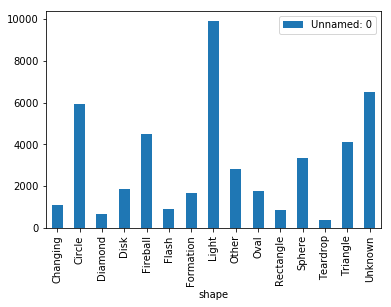

In [121]:
shape_count.plot(kind='bar')

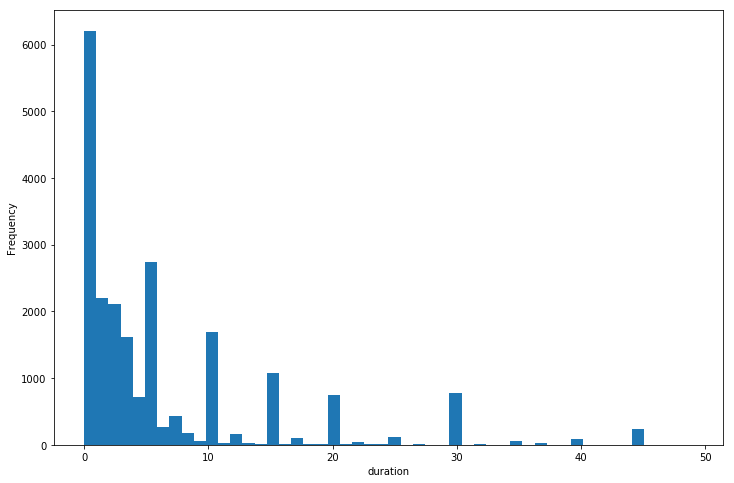

In [133]:
df[df['duration_correct']<50]['duration_correct'].plot(kind='hist',bins=50, figsize=(12,8))
plt.xlabel('duration')

Need to convert description to string

In [135]:
def convert_to_string(x):
    try:
        return x.encode('utf-8', 'ignore').decode('ascii')
    except:
        return ''

In [136]:
df['desc'] = df['desc'].apply(lambda x: convert_to_string(x))

### Topic analysis of description

In [137]:
description = df['desc'].values

In [138]:
def build_text_vectorizer(contents, use_stemmer=False, max_features=None):
    '''
    Build and return a **callable** for transforming text documents to vectors,
    as well as a vocabulary to map document-vector indices to words from the
    corpus. The vectorizer will be trained from the text documents in the
    `contents` argument. If `use_tfidf` is True, then the vectorizer will use
    the Tf-Idf algorithm, otherwise a Bag-of-Words vectorizer will be used.
    The text will be tokenized by words, and each word will be stemmed iff
    `use_stemmer` is True. If `max_features` is not None, then the vocabulary
    will be limited to the `max_features` most common words in the corpus.
    '''
    Vectorizer = TfidfVectorizer
    tokenizer = RegexpTokenizer(r"[\w']+")
    stem = PorterStemmer().stem if use_stemmer else (lambda x: x)
    stop_set = set(stopwords.words('english'))

    # Closure over the tokenizer et al.
    def tokenize(text):
        tokens = tokenizer.tokenize(text)
        stems = [stem(token) for token in tokens if token not in stop_set]
        return stems

    vectorizer_model = Vectorizer(tokenizer=tokenize, max_features=max_features)
    vectorizer_model.fit(contents)
    vocabulary = np.array(vectorizer_model.get_feature_names())

    # Closure over the vectorizer_model's transform method.
    def vectorizer(X):
        return vectorizer_model.transform(X).toarray()

    return vectorizer, vocabulary

In [139]:
vect, vocab = build_text_vectorizer(description, use_stemmer=True, max_features=500)


In [140]:
tfidf = vect(description)

In [141]:
tfidf.shape

(23394, 500)

In [142]:
nmf = NMF(n_components=6, max_iter=100, alpha=0.00001)
W = nmf.fit_transform(tfidf)
H = nmf.components_

In [143]:
W.shape

(23394, 6)

In [144]:
def hand_label_topics(H, vocabulary):
    '''
    Print the most influential words of each latent topic, and prompt the user
    to label each topic. The user should use their humanness to figure out what
    each latent topic is capturing.
    '''
    hand_labels = []
    for i, row in enumerate(H):
        top_five = np.argsort(row)[::-1][:10]
        print 'topic', i
        print '-->', ' '.join(vocabulary[top_five])
        label = raw_input('please label this topic: ')
        hand_labels.append(label)
        print
    return hand_labels


In [145]:
hand_labels = hand_label_topics(H, vocab)

topic 0
--> look like see saw star could back went go sky
please label this topic: comparisons

topic 1
--> nuforc pd provid inform note contact elect anonym remain total
please label this topic: anonymous

topic 2
--> light bright flash red white move green sky blue disappear
please label this topic: colours

topic 3
--> orang orb firebal disappear ball one glow move sky east
please label this topic: fire

topic 4
--> object shape move sky appear observ travel speed color white
please label this topic: movement

topic 5
--> craft fli shape triangl low sound light triangular aircraft hover
please label this topic: shapes



In [146]:
hand_labels = np.asarray(hand_labels)
top_topic = hand_labels[W.argmax(1)]

In [147]:
df['top_topic'] = top_topic

In [148]:
df.head()

,Unnamed: 0,occurred,city,state,shape,duration,desc,duration_correct,top_topic
0,0,2017-05-06 05:00:00,Camp McGregor,nm,Light,10 minutes,Light seen over mountain's east of Camp McGreg...,10,colours
1,1,2017-05-06 04:50:00,Mojave (Canada),None,Light,1:00,Light in sky stationary. Not a airplane or an...,1,anonymous
2,2,2017-05-05 11:30:00,Austin,tx,Disk,3 seconds,"Flying saucer descends, possibly lands in Nort...",0,comparisons
3,3,2017-05-05 03:00:00,El Mirage,az,Circle,30 seconds,"While letting my dog out, a very bright white ...",0,colours
4,4,2017-05-04 23:34:00,York,ne,Fireball,0:18,,0,comparisons


In [149]:
df['year_occurred'] = df['occurred'].dt.year
df['month_occurred'] = df['occurred'].dt.month
df['date_occurred'] = df['occurred'].dt.date
df['time_occurred'] = df['occurred'].dt.time
df['year-month'] = df['year_occurred'] + df['month_occurred']/12
df.dtypes

Unnamed: 0                   int64
occurred            datetime64[ns]
city                        object
state                       object
shape                       object
duration                    object
desc                        object
duration_correct             int64
top_topic                   object
year_occurred              float64
month_occurred             float64
date_occurred               object
time_occurred               object
year-month                 float64
dtype: object

In [150]:
df2 = pd.DataFrame({'count': df.groupby(['year_occurred','top_topic']).size()}).reset_index()
df2 = df2.pivot(index='year_occurred', columns='top_topic', values='count')

In [151]:
df2 = pd.DataFrame({'count': df.groupby(['year-month','top_topic']).size()}).reset_index()
df2.head(10)

,year-month,top_topic,count
0,1721.333333,colours,1
1,1905.500000,shapes,1
2,1905.583333,comparisons,1
3,1905.583333,shapes,1
4,1930.666667,comparisons,1
5,1930.750000,comparisons,1
6,1931.833333,colours,1
7,1932.916667,fire,1
8,1935.083333,movement,1
9,1935.416667,comparisons,1


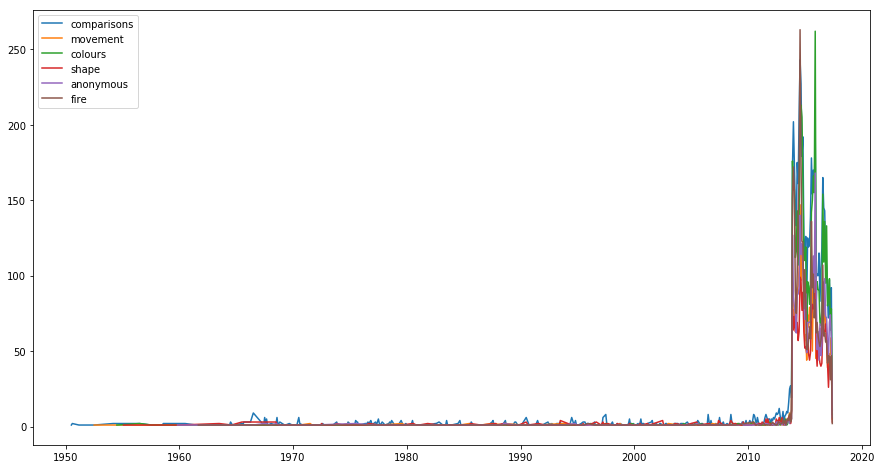

In [51]:
df3 = df2[df2['year-month'] > 1950]
col = ['r','b','g','k','c','m']
topics = list(df3.top_topic.unique())
colours = df3.top_topic.apply(lambda x: col[topics.index(x)])
plt.figure(figsize=(15,8))
for t in topics:
    plt.plot(df3[df3['top_topic']==t]['year-month'],df3[df3['top_topic']==t]['count'], label=t)
plt.legend(loc='best')


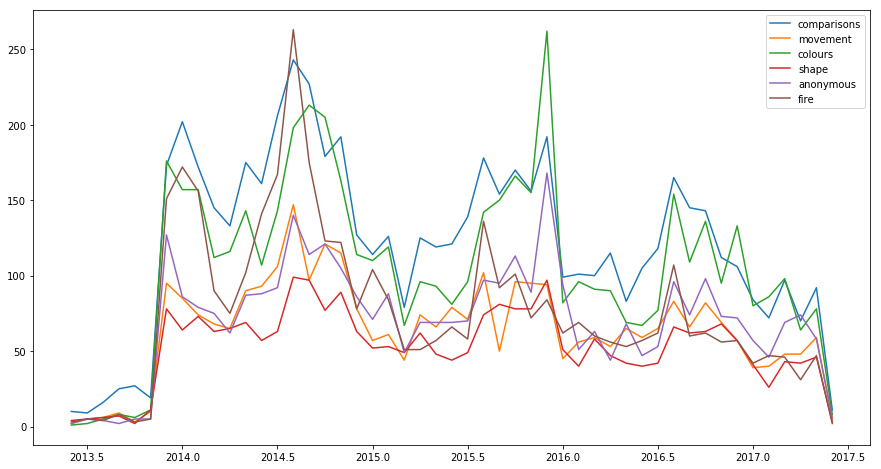

In [52]:
df4 = df2[(df2['year-month'] > 2013.4)]
col = ['r','b','g','k','c','m']
colours = df4.top_topic.apply(lambda x: col[topics.index(x)])
plt.figure(figsize=(15,8))
for t in topics:
    plt.plot(df4[df4['top_topic']==t]['year-month'],df4[df4['top_topic']==t]['count'], label=t)
plt.legend(loc='best')

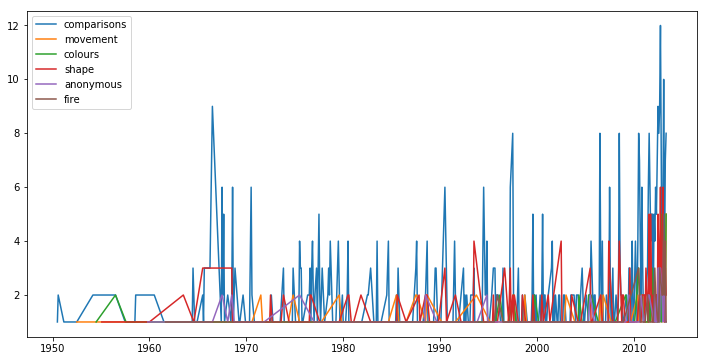

In [53]:
df5 = df2[(df2['year-month'] < 2013.4) & (df2['year-month'] > 1950)]
col = ['r','b','g','k','c','m']
colours = df5.top_topic.apply(lambda x: col[topics.index(x)])
plt.figure(figsize=(12,6))
for t in topics:
    plt.plot(df5[df5['top_topic']==t]['year-month'],df5[df5['top_topic']==t]['count'], label=t)
plt.legend(loc='best')

In [157]:
colours = df[df['top_topic'] == 'colours']
colour_post_2013 = colours[colours['year_occurred']>2012]
colour_post_2013.groupby('state').size()

state
None    286
ak       32
al       52
ar       27
az      252
ca      503
co      113
ct       47
dc        1
de       18
fl      284
ga      114
hi       35
ia       32
id       68
il       87
in       52
ks       43
ky       51
la       45
ma       95
md       73
me       40
mi      151
mn       90
mo       60
ms       27
mt       43
nc      184
nd        7
ne       16
nh       56
nj       80
nm       66
nv       56
ny      147
oh      145
ok       52
or      145
pa      168
ri       28
sc       97
sd       17
tn       70
tx      112
ut       62
va      101
vt       34
wa      171
wi       98
wv       31
wy        9
dtype: int64